### Capstone Project

##### Author: Guntaas Kaur
##### Contact: guntaaskaur1@gmail.com
##### Date: 22-02-2024

## Introduction
<b>Predicting Small Businesses Success & Failure </b><br>
Understanding the Reasons Behind Small Business Failures and Leveraging Machine Learning for Enhanced Success

Data Dictionary

Businesses:

Business ID: Unique identifier for each business.
Name: Name of the business.
Address: Address of the business.
City: The city where the business is located.
State: State where the business is located.
Postal Code: Postal code of the business.
Latitude: Latitude coordinates of the business location.
Longitude: Longitude coordinate of the business location.
Stars: Average rating of the business.
Review Count: Number of reviews the business has received.
Is Open: Indicates if the business is currently open (1 for open, 0 for closed).
Attributes: Additional attributes or features of the business.
Categories: Categories or types of services offered by the business.
Hours: Operating hours of the business.



Reviews:

Review ID: Unique identifier for each review.
User ID: Unique identifier for the user who wrote the review.
Business ID: Unique identifier for the business being reviewed.
Stars: Rating given by the user (1 to 5 stars).
Text: The text content of the review.
Date: The date when the review was written.

Users:

User ID: Unique identifier for each user.
Name: User's name.
Review Count: Number of reviews written by the user.
Average Stars: Average rating given by the user.
Yelper Since: Date when the user joined Yelp.

Tips:

User ID: Unique identifier for the user who wrote the tip.
Business ID: Unique identifier for the business the tip is about.
Text: The text content of the tip.
Date: The date when the tip was written.



---
### <a id="BasicAnalysis"> Part 1 Basic Analysis</a>
---

In [41]:
#importing required libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_business=pd.read_json('data/yelp_academic_dataset_business.json', lines=True)

In [3]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [4]:
df_business.shape

(150346, 14)

In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


<b>Flattening Nested Structures:</b>
The dataset contains nested dictionaries and JSON-like structures, had to flatten them into string representations to create flat feature vectors suitable for modeling.
First, we will convert hours to string then extract day and time, later we will convert time to timestamp.

In [6]:
df_business['hours']

0                                                      None
1         {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2         {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3         {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4         {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
                                ...                        
150341    {'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...
150342    {'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...
150343                                                 None
150344    {'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...
150345    {'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...
Name: hours, Length: 150346, dtype: object

In [7]:
one_row = df_business.iloc[1]

# Print the selected row
print(one_row)

business_id                                mpf3x-BjTdTEA3yCZrAYPw
name                                                The UPS Store
address                           87 Grasso Plaza Shopping Center
city                                                       Affton
state                                                          MO
postal_code                                                 63123
latitude                                                38.551126
longitude                                              -90.335695
stars                                                         3.0
review_count                                                   15
is_open                                                         1
attributes                 {'BusinessAcceptsCreditCards': 'True'}
categories      Shipping Centers, Local Services, Notaries, Ma...
hours           {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
Name: 1, dtype: object


In [8]:
df_business['hours_str'] = df_business['hours'].apply(str)

# Split the string representation of the dictionary into two separate columns using reg exp
df_business[['day', 'time']] = df_business['hours_str'].str.extract(r"'(.*?)': '(.*?)'")

df_business = df_business.drop(['hours', 'hours_str'], axis=1)

print(df_business)

                   business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tuc

In [9]:
df_business['attributes_str'] = df_business['attributes'].apply(str)

# Split the string representation of the dictionary into two separate columns using reg exp
df_business[['attribute_name', 'attribute_value']] = df_business['attributes_str'].str.extract(r"'(.*?)': '(.*?)'")

df_business = df_business.drop(['attributes', 'attributes_str'], axis=1)

print(df_business)

                   business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tuc

In [10]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   business_id      150346 non-null  object 
 1   name             150346 non-null  object 
 2   address          150346 non-null  object 
 3   city             150346 non-null  object 
 4   state            150346 non-null  object 
 5   postal_code      150346 non-null  object 
 6   latitude         150346 non-null  float64
 7   longitude        150346 non-null  float64
 8   stars            150346 non-null  float64
 9   review_count     150346 non-null  int64  
 10  is_open          150346 non-null  int64  
 11  categories       150243 non-null  object 
 12  day              127123 non-null  object 
 13  time             127123 non-null  object 
 14  attribute_name   135065 non-null  object 
 15  attribute_value  135065 non-null  object 
dtypes: float64(3), int64(2), object(11)
me

In [11]:
# Split time
df_business[['start_time', 'end_time']] = df_business['time'].str.extract(r'(\d+:\d+)-(\d+:\d+)')

df_business = df_business.drop(['time'], axis=1)

print(df_business)

                   business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                  5255 E Broadway Blvd         Tuc

In [12]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   business_id      150346 non-null  object 
 1   name             150346 non-null  object 
 2   address          150346 non-null  object 
 3   city             150346 non-null  object 
 4   state            150346 non-null  object 
 5   postal_code      150346 non-null  object 
 6   latitude         150346 non-null  float64
 7   longitude        150346 non-null  float64
 8   stars            150346 non-null  float64
 9   review_count     150346 non-null  int64  
 10  is_open          150346 non-null  int64  
 11  categories       150243 non-null  object 
 12  day              127123 non-null  object 
 13  attribute_name   135065 non-null  object 
 14  attribute_value  135065 non-null  object 
 15  start_time       127123 non-null  object 
 16  end_time         127123 non-null  obje

In [13]:
# Converting 'start_time' and 'end_time' columns to datetime
df_business['start_time'] = pd.to_datetime(df_business['start_time'], format='%H:%M')
df_business['end_time'] = pd.to_datetime(df_business['end_time'], format='%H:%M')

In [14]:
df_business.dtypes

business_id                object
name                       object
address                    object
city                       object
state                      object
postal_code                object
latitude                  float64
longitude                 float64
stars                     float64
review_count                int64
is_open                     int64
categories                 object
day                        object
attribute_name             object
attribute_value            object
start_time         datetime64[ns]
end_time           datetime64[ns]
dtype: object

<b>Size and Structure: 
    The DataFrame contains 150,346 rows and 16 columns(after feature engineering).

Data Types: 
    The columns contain a mix of data types:

3 columns are of type float64.
2 columns are of type int64.
9 columns are of type object (likely strings).
Missing Values: Some columns have missing values:

The 'attributes','categories' and 'hours' column has missing values.

In [15]:
df_business.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
150341    False
150342    False
150343    False
150344    False
150345    False
Length: 150346, dtype: bool

In [16]:
df_business.duplicated().sum()

0

Empty dataset specifies that there are no duplicate values in specified columns

In [17]:
df_business.isna().sum()

business_id            0
name                   0
address                0
city                   0
state                  0
postal_code            0
latitude               0
longitude              0
stars                  0
review_count           0
is_open                0
categories           103
day                23223
attribute_name     15281
attribute_value    15281
start_time         23223
end_time           23223
dtype: int64

In [18]:
df_business.isna().mean()*100

business_id         0.000000
name                0.000000
address             0.000000
city                0.000000
state               0.000000
postal_code         0.000000
latitude            0.000000
longitude           0.000000
stars               0.000000
review_count        0.000000
is_open             0.000000
categories          0.068509
day                15.446370
attribute_name     10.163889
attribute_value    10.163889
start_time         15.446370
end_time           15.446370
dtype: float64

The percentage of null for categories is much smaller. For the <3% missing columns we can take any reasonable approach. For the day, attribute_name, attribute_value, start_time and end_time columns it may be worth imputing these values as dropping 15.44% and 9.14% of rows may be too much data loss.

In [19]:
df_business=df_business.dropna(subset=['categories',],axis=0)

In [20]:
df_business.isna().mean()*100

business_id         0.000000
name                0.000000
address             0.000000
city                0.000000
state               0.000000
postal_code         0.000000
latitude            0.000000
longitude           0.000000
stars               0.000000
review_count        0.000000
is_open             0.000000
categories          0.000000
day                15.388404
attribute_name     10.102967
attribute_value    10.102967
start_time         15.388404
end_time           15.388404
dtype: float64

In [21]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150243 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   business_id      150243 non-null  object        
 1   name             150243 non-null  object        
 2   address          150243 non-null  object        
 3   city             150243 non-null  object        
 4   state            150243 non-null  object        
 5   postal_code      150243 non-null  object        
 6   latitude         150243 non-null  float64       
 7   longitude        150243 non-null  float64       
 8   stars            150243 non-null  float64       
 9   review_count     150243 non-null  int64         
 10  is_open          150243 non-null  int64         
 11  categories       150243 non-null  object        
 12  day              127123 non-null  object        
 13  attribute_name   135064 non-null  object        
 14  attribute_value  135064 n

#### Deciding between Mean/Median imputation

For the remaining columns, we need to decide on whether to use the median or mean to impute.


In [35]:
# Assuming 'start_time' and 'end_time' columns contain the start and end times in string format
df_business_filtered = df_business[~((df_business['start_time'] == '1900-01-01 00:00:00') & (df_business['end_time'] == '1900-01-01 00:00:00'))]


/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_42228/3200098670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_filtered['start_time'] = pd.to_datetime(df_business_filtered['start_time'], format='%H:%M')
/var/folders/rc/713vct4s6wg859ww_2h0w03w0000gn/T/ipykernel_42228/3200098670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_filtered['end_time'] = pd.to_datetime(df_business_filtered['end_time'], format='%H:%M')


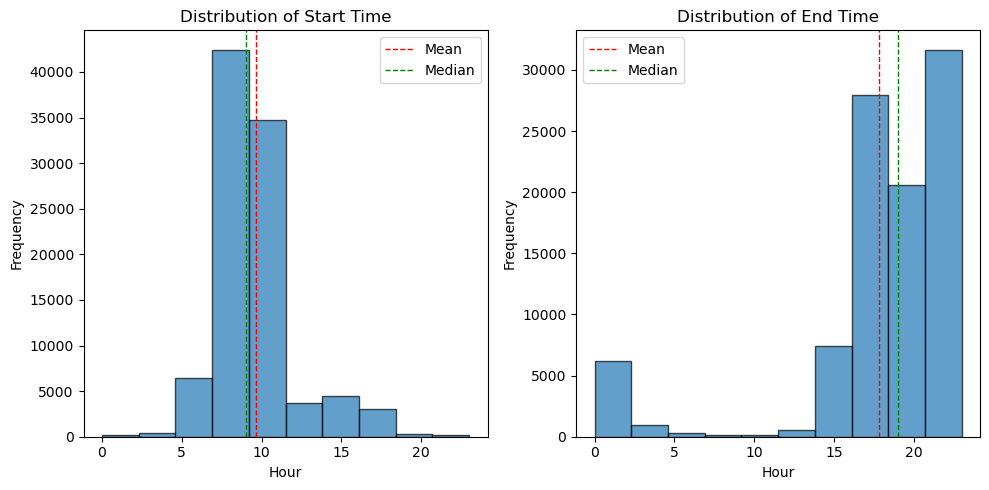

In [36]:

# Convert to datetime objects
df_business_filtered['start_time'] = pd.to_datetime(df_business_filtered['start_time'], format='%H:%M')
df_business_filtered['end_time'] = pd.to_datetime(df_business_filtered['end_time'], format='%H:%M')

# Plot histograms for start_time and end_time columns
plt.figure(figsize=(10, 5))

# Plot histogram for start_time
plt.subplot(1, 2, 1)
plt.hist(df_business_filtered['start_time'].dt.hour, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(df_business_filtered['start_time'].dt.hour.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_business_filtered['start_time'].dt.hour.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of Start Time')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram for end_time
plt.subplot(1, 2, 2)
plt.hist(df_business_filtered['end_time'].dt.hour, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(df_business_filtered['end_time'].dt.hour.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df_business_filtered['end_time'].dt.hour.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of End Time')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In both cases we can see that median is better, for the Start_time and end_time column we can see that the median lies pretty close to the peak of histogram. 

In [38]:

# Computing the median time for start_time and end_time
median_start_time = df_business['start_time'].median()
median_end_time = df_business['end_time'].median()

# Filling missing values with median time
df_business['start_time'].fillna(median_start_time, inplace=True)
df_business['end_time'].fillna(median_end_time, inplace=True)

To be continued...